In [142]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [143]:
p = 10
r = 28
b = 8/3

In [144]:
dt = 1e-2
x = 1
y = 1
z = 1
X = [x]
Y = [y]
Z = [z]

for _ in range(100):
    dx = (-p*x + p*y) * dt
    dy = (-x*z + r*x - y) * dt
    dz = (x*y - b*z) * dt
    x += dx
    y += dy
    z += dz
    X.append(x)
    Y.append(y)
    Z.append(z)

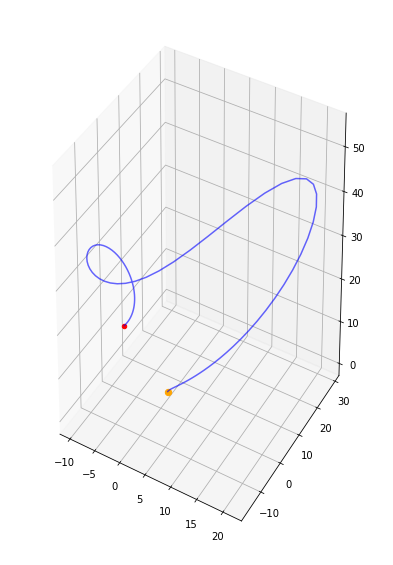

In [145]:
#%matplotlib notebook
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
ax.plot(X, Y, Z, color='blue', alpha=0.6)
ax.scatter(X[-1], Y[-1], Z[-1], color='red', s=20)
ax.scatter(X[0], Y[0], Z[0], color='orange', s=40)

In [525]:
N = 16000
dt = 1e-3
def lorenz(x, y, z, p=10, r=28, b=8/3):    
    X = [x]
    Y = [y]
    Z = [z]
    for _ in range(N):
        dx = (-p*x + p*y) * dt
        dy = (-x*z + r*x - y) * dt
        dz = (x*y - b*z) * dt
        x += dx
        y += dy
        z += dz
        X.append(x)
        Y.append(y)
        Z.append(z)
    return X, Y, Z

X1, Y1, Z1 = lorenz(1, 1, 1)
X2, Y2, Z2 = lorenz(1.01, 1, 1)

26.00564916954201 :  14359 / 15999


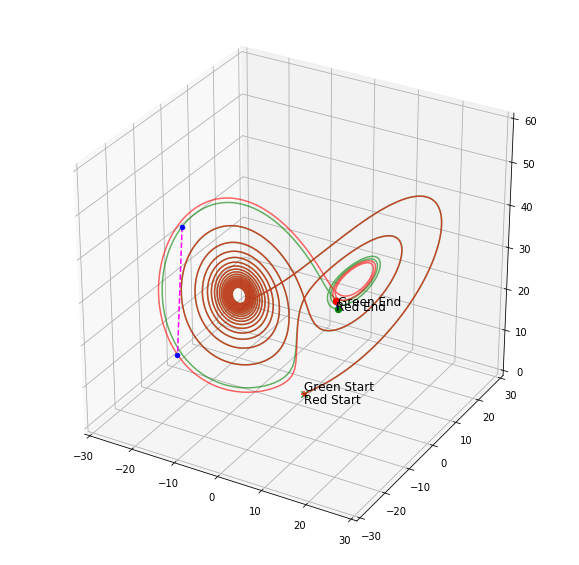

5.373959832985111 7.140534031787886 19.871643857588865


In [526]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(0,60)

ax.plot(X1, Y1, Z1, color='green', alpha=0.6)
ax.scatter(X1[0], Y1[0], Z1[0], color='green', s=40, marker='x', alpha=0.8)
ax.scatter(X1[-1], Y1[-1], Z1[-1], color='green', s=40)
ax.text(X1[0], Y1[0], Z1[0], s='Green Start', color='k', verticalalignment='bottom', fontsize=12)
ax.text(X1[-1], Y1[-1], Z1[-1], s='Green End', color='k', verticalalignment='bottom', fontsize=12)

ax.plot(X2, Y2, Z2, color='red', alpha=0.6)
ax.scatter(X2[0], Y2[0], Z2[0], color='red', s=40, marker='+', alpha=0.8)
ax.scatter(X2[-1], Y2[-1], Z2[-1], color='red', s=40)
ax.text(X2[0], Y2[0], Z2[0], s='Red Start', color='k', verticalalignment='top', fontsize=12)
ax.text(X2[-1], Y2[-1], Z2[-1], s='Red End', color='k', verticalalignment='top', fontsize=12)

ax.plot([X1[-1], X2[-1]], [Y1[-1], Y2[-1]], [Z1[-1], Z2[-1]], linestyle='--', color='blue')

D = [np.linalg.norm(np.array([X1[i], Y1[i], Z1[i]]) - np.array([X2[i], Y2[i], Z2[i]])) for i in range(N)]
MX = D.index(max(D))
print(max(D), ': ', MX, '/', N-1)
ax.scatter(X1[MX], Y1[MX], Z1[MX], color='blue', s=20)
ax.scatter(X2[MX], Y2[MX], Z2[MX], color='blue', s=20)
ax.plot([X1[MX], X2[MX]], [Y1[MX], Y2[MX]], [Z1[MX], Z2[MX]], linestyle='--', color='magenta')
#[ax.plot([X1[i], X2[i]], [Y1[i], Y2[i]], [Z1[i], Z2[i]], alpha=0.3) for i in range(N)]
plt.show()
print(X1[-1], Y1[-1], Z1[-1])

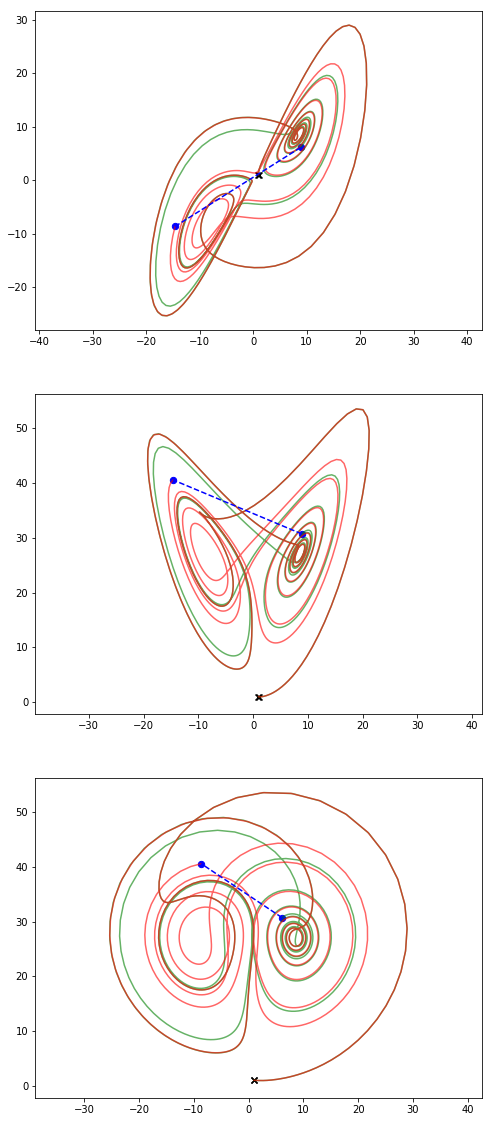

In [360]:
fig = plt.figure(figsize=(8,20))
ax1 = fig.add_subplot(311)
#ax1.set_xlim(-30, 30)
ax1.axis('equal')
ax1.plot(X1, Y1, color='green', alpha=0.6)
ax1.plot(X2, Y2, color='red', alpha=0.6)
ax1.scatter([X1[0], X2[0]], [Y2[0], Y2[0]], marker='x', color='k')
ax1.plot([X1[-1], X2[-1]], [Y1[-1], Y2[-1]], linestyle='--', color='blue')
ax1.scatter([X1[-1], X2[-1]], [Y1[-1], Y2[-1]], s=40, color='blue')

ax2 = fig.add_subplot(312)
ax2.axis('equal')
ax2.plot(X1, Z1, color='green', alpha=0.6)
ax2.plot(X2, Z2, color='red', alpha=0.6)
ax2.scatter([X1[0], X2[0]], [Z2[0], Z2[0]], marker='x', color='k')
ax2.plot([X1[-1], X2[-1]], [Z1[-1], Z2[-1]], linestyle='--', color='blue')
ax2.scatter([X1[-1], X2[-1]], [Z1[-1], Z2[-1]], s=40, color='blue')

ax3 = fig.add_subplot(313)
ax3.axis('equal')
ax3.plot(Y1, Z1, color='green', alpha=0.6)
ax3.plot(Y2, Z2, color='red', alpha=0.6)
ax3.scatter([Y1[0], Y2[0]], [Z2[0], Z2[0]], marker='x', color='k')
ax3.plot([Y1[-1], Y2[-1]], [Z1[-1], Z2[-1]], linestyle='--', color='blue')
ax3.scatter([Y1[-1], Y2[-1]], [Z1[-1], Z2[-1]], s=40, color='blue')


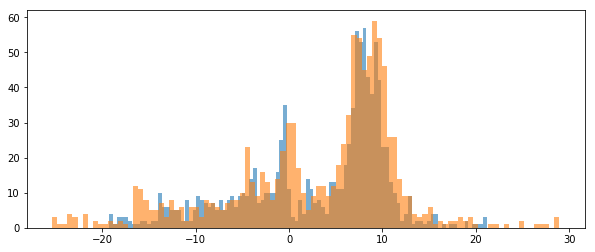

In [361]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ax.hist(X1, bins=N//10, alpha=0.6)
ax.hist(Y1, bins=N//10, alpha=0.6)
#ax.hist(Z1, bins=N//10, alpha=0.3)
plt.show()

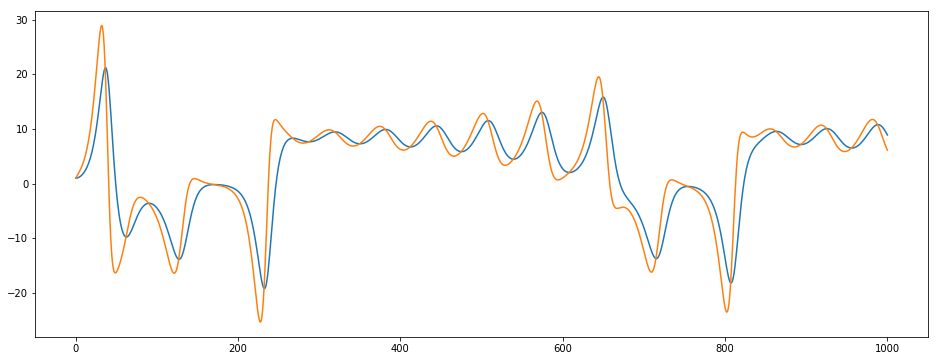

In [362]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)
# ax.scatter(list(range(N+1)), X1, s=2)
# ax.scatter(list(range(N+1)), Y1, s=2)
# ax.scatter(list(range(N+1)), np.array(Z1)-20, s=2)
ax.plot(list(range(N+1)), X1)
ax.plot(list(range(N+1)), Y1)
#ax.plot(list(range(N+1)), np.array(Z1)-20)

INDEX MAX: 797


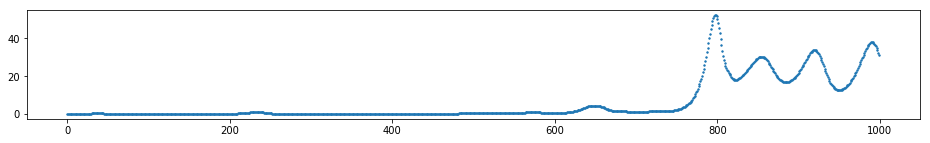

In [355]:
#D = [np.linalg.norm(np.array([X1[i], Y1[i], Z1[i]]) - np.array([X2[i], Y2[i], Z2[i]])) for i in range(N)]
plt.figure(figsize=(16, 2))
#plt.plot(list(range(N)), D)
plt.scatter(list(range(N)), D, s=2)
print('INDEX MAX:', D.index(max(D)))

(20000, 3)


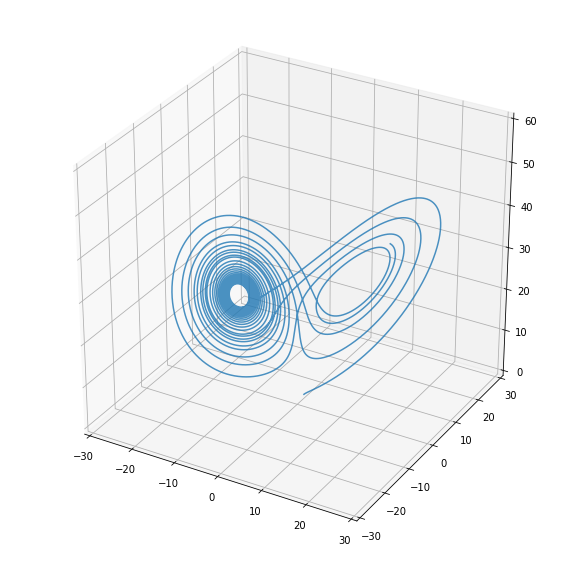

13.841275207276121 13.122233311794725 34.849856937701375


In [518]:
# https://en.wikipedia.org/wiki/Lorenz_system
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z

state0 = [1.0, 1.0, 1.0]
dt = 1e-3
N = 20000
t = np.arange(0.0, N*dt, dt)

states = odeint(f, state0, t)
print(states.shape)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(0, 60)
ax.plot(states[:, 0], states[:, 1], states[:, 2], alpha=0.8)
plt.show()
print(states[-1, 0], states[-1, 1], states[-1, 2])

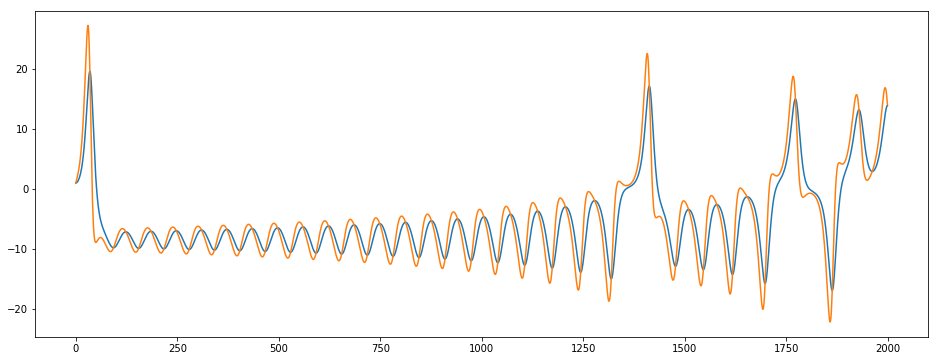

In [406]:
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(111)
ax.plot(t/dt, states[:, 0])
ax.plot(t/dt, states[:, 1])

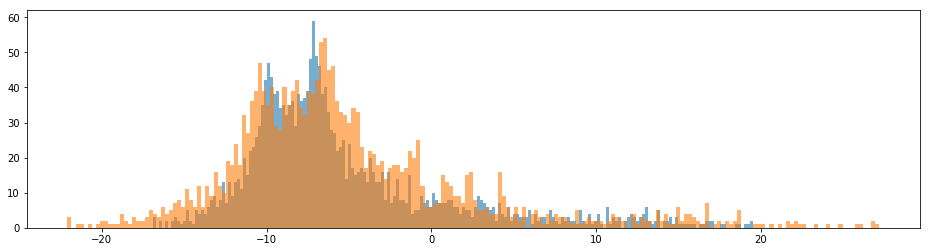

In [410]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(111)
ax.hist(states[:, 0], bins=N//10, alpha=0.6)
ax.hist(states[:, 1], bins=N//10, alpha=0.6)
#ax.hist(Z1, bins=N//10, alpha=0.3)
plt.show()

7000


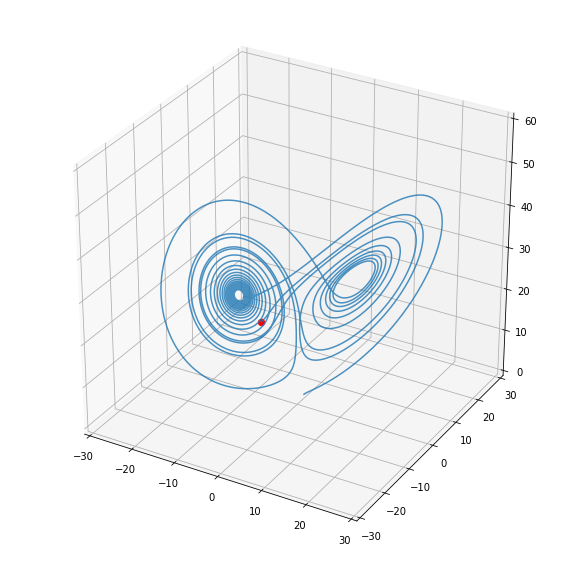

In [522]:
# Runge-Kutta
p, r, b = 10.0, 28.0, 8.0/3.0
def v1(t, x, y, z):
    return(-p * x + p * y)
def v2(t, x, y, z):
    return(-x * z + r * x - y)
def v3(t, x, y, z):
    return(x * y - b * z)
 
def runge_kutta(x0, T, dt, vectorfield):
    width = len(x0)
    x = x0
    t = 0.0
    orbit = []
    while t <= T:
        orbit.append(list(x))
        x1 = x
        # python3 requests list() as below:
        k1 = list(map(lambda v: v(t, *x1), vectorfield))
        x2 = x
        for i in range(width):
            x2[i] += dt / 2.0 * k1[i]
        k2 = list(map(lambda v: v(t + dt / 2.0, *x2), vectorfield))
        x3 = x
        for i in range(width):
            x3[i] += dt / 2 * k2[i]
        k3 = list(map(lambda v: v(t + dt / 2.0, *x3), vectorfield))
        x4 = x
        for i in range(width):
            x4[i] += dt * k3[i]
        k4 = list(map(lambda v: v(t + dt, *x4), vectorfield))
        for i in range(width):
            x[i] += dt / 6.0 * (k1[i] + 2.0 * k2[i] + 2.0 * k3[i] + k4[i])
        t += dt
    return orbit

x0 = [1, 1, 1]
T = 7
dt = 1e-3
vector = [v1, v2, v3]
orbit = runge_kutta(x0, T, dt, vector)
X4 = []
Y4 = []
Z4 = []
for x, y, z in orbit:
    X4.append(x)
    Y4.append(y)
    Z4.append(z)
    
print(len(X4))
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-30,30)
ax.set_ylim(-30,30)
ax.set_zlim(0, 60)
ax.plot(X4, Y4, Z4, alpha=0.8)
ax.scatter(X4[-1], Y4[-1], Z4[-1], color='red', s=40)
plt.show()

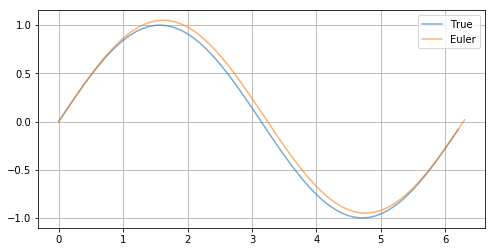

In [614]:
dt = 0.1
T = np.pi * 2
tx = np.arange(0, T, dt)
ty = np.sin(tx)

x = 0
y = 0
X = [x]
Y = [y]
while x <= T:
    dx = dt
    dy = np.cos(x) * dt
    x += dx
    y += dy
    X.append(x)
    Y.append(y)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
ax.grid()
ax.plot(tx, ty, label='True ', alpha=0.6)
ax.plot(X, Y, label='Euler', alpha=0.6)
ax.legend()

In [620]:
1e-3

0.001

ほほ 10
